Importing all important libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


Loading data

In [4]:
train_data = np.load("datasets/train/train_feature.npz", allow_pickle=True)
val_data = np.load("datasets/valid/valid_feature.npz", allow_pickle=True)
test_data = np.load("datasets/test/test_feature.npz", allow_pickle=True)

In [5]:
x_train = train_data['features']  
y_train = train_data['label']  

x_val = val_data['features']
y_val = val_data['label']

x_test = test_data['features'] 

In [14]:
percentages = list(range(5, 105, 5))

In [6]:
x_train= x_train.reshape(x_train.shape[0], -1)
x_val = x_val.reshape(x_val.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

Function to train and validating different models

In [16]:
def train_validate_model(model, X_train, y_train):
  results_list = []

  for percentage in percentages:
      num_samples = int((percentage / 100) * len(X_train))
      X_train_sample, y_train_sample = resample(X_train, y_train, n_samples=num_samples, random_state=42)
      model.fit(X_train_sample, y_train_sample)
      y_val_pred = model.predict(x_val)
      report = classification_report(y_val, y_val_pred, output_dict=True)
      accuracy = accuracy_score(y_val, y_val_pred)

      results_list.append({
        'Percentage of Training Data': percentage,
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
      })

  return pd.DataFrame(results_list)

Function to plot scores of different models 

In [17]:
def plot_results(model,results):
  plt.figure(figsize=(15, 5))
  plt.plot(results['Percentage of Training Data'], results['Accuracy'], marker='o', label='Accuracy')
  plt.plot(results['Percentage of Training Data'], results['Precision'], marker='o', label='Precision')
  plt.plot(results['Percentage of Training Data'], results['Recall'], marker='o', label='Recall')
  plt.plot(results['Percentage of Training Data'], results['F1-Score'], marker='o', label='F1-Score')
  plt.title(model+' Performance Metrics')
  plt.xlabel('Percentage of Training Data')
  plt.ylabel('Score')
  plt.xticks(results['Percentage of Training Data'])
  plt.legend()
  plt.grid()
  plt.show()

Logistic Regression

In [18]:
lr_model=LogisticRegression()
lr_result=train_validate_model(lr_model, x_train, y_train)
print(lr_result)

c:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

    Percentage of Training Data  Accuracy  Precision    Recall  F1-Score
0                             5  0.901840   0.902369  0.901840  0.901863
1                            10  0.916155   0.916187  0.916155  0.916136
2                            15  0.932515   0.932654  0.932515  0.932487
3                            20  0.942740   0.942830  0.942740  0.942722
4                            25  0.940695   0.940695  0.940695  0.940691
5                            30  0.948875   0.948876  0.948875  0.948872
6                            35  0.963190   0.963333  0.963190  0.963197
7                            40  0.969325   0.969541  0.969325  0.969332
8                            45  0.969325   0.969407  0.969325  0.969330
9                            50  0.973415   0.973426  0.973415  0.973417
10                           55  0.969325   0.969407  0.969325  0.969330
11                           60  0.973415   0.973426  0.973415  0.973417
12                           65  0.979550   0.97955

c:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


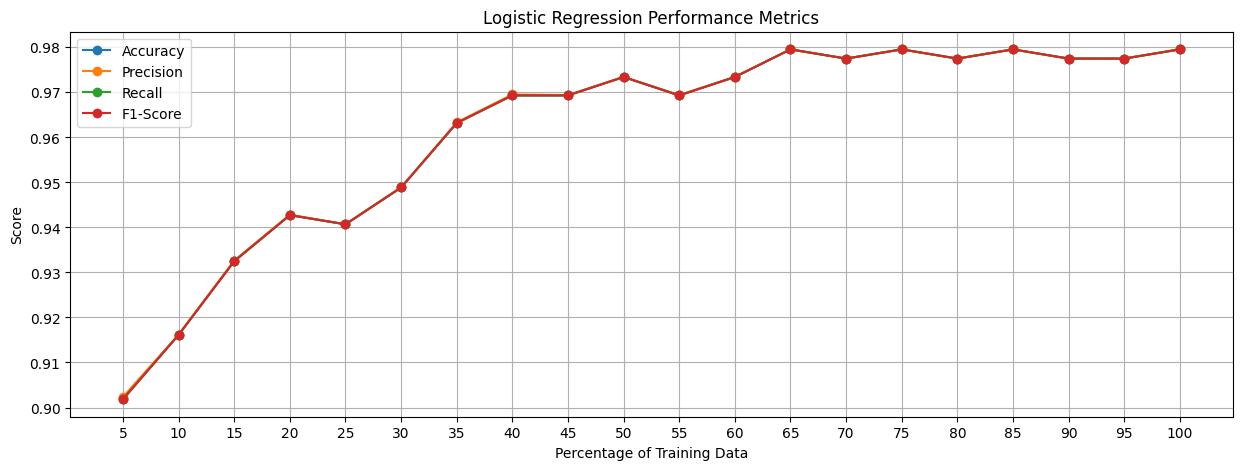

In [19]:
plot_results('Logistic Regression',lr_result)

Decision Tree Classifier

In [20]:
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_result = train_validate_model(dtc_model, x_train, y_train)
print(dtc_result)

    Percentage of Training Data  Accuracy  Precision    Recall  F1-Score
0                             5  0.834356   0.835572  0.834356  0.834374
1                            10  0.897751   0.897751  0.897751  0.897736
2                            15  0.885481   0.886582  0.885481  0.885498
3                            20  0.879346   0.880227  0.879346  0.879161
4                            25  0.914110   0.914110  0.914110  0.914110
5                            30  0.926380   0.926427  0.926380  0.926388
6                            35  0.930470   0.930470  0.930470  0.930470
7                            40  0.932515   0.933178  0.932515  0.932531
8                            45  0.942740   0.942888  0.942740  0.942751
9                            50  0.936605   0.936621  0.936605  0.936609
10                           55  0.948875   0.948962  0.948875  0.948883
11                           60  0.963190   0.963230  0.963190  0.963194
12                           65  0.936605   0.93690

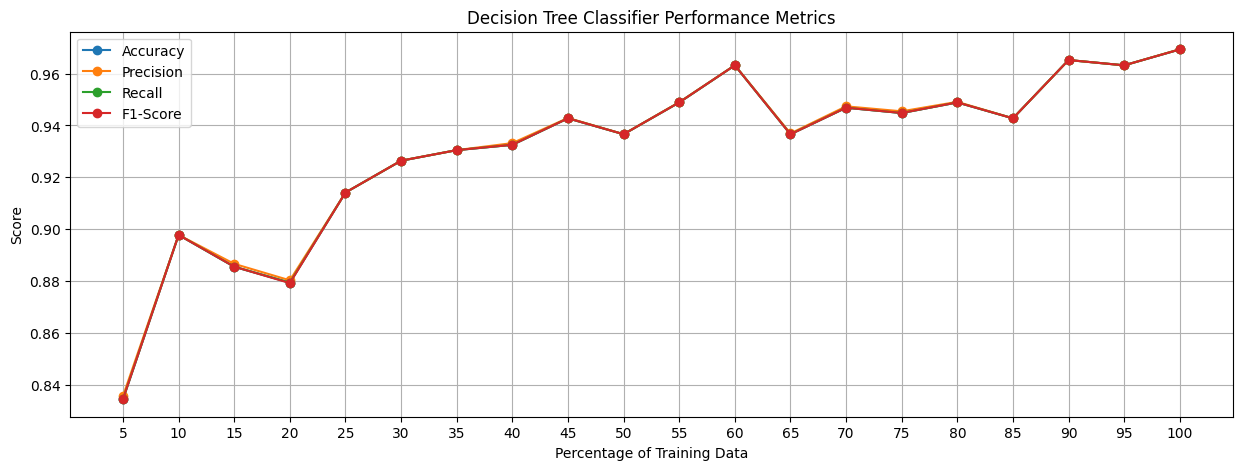

In [21]:
plot_results('Decision Tree Classifier',dtc_result)

Random Forest Classifier

In [22]:
rfc_model = RandomForestClassifier()
rfc_result = train_validate_model(rfc_model, x_train, y_train)
print(rfc_result)

    Percentage of Training Data  Accuracy  Precision    Recall  F1-Score
0                             5  0.905930   0.907050  0.905930  0.905945
1                            10  0.924335   0.924352  0.924335  0.924340
2                            15  0.944785   0.944832  0.944785  0.944773
3                            20  0.944785   0.944786  0.944785  0.944782
4                            25  0.967280   0.967303  0.967280  0.967276
5                            30  0.969325   0.969541  0.969325  0.969332
6                            35  0.967280   0.967320  0.967280  0.967284
7                            40  0.959100   0.959244  0.959100  0.959108
8                            45  0.967280   0.967320  0.967280  0.967284
9                            50  0.975460   0.975486  0.975460  0.975457
10                           55  0.973415   0.973477  0.973415  0.973409
11                           60  0.975460   0.975498  0.975460  0.975463
12                           65  0.971370   0.97140

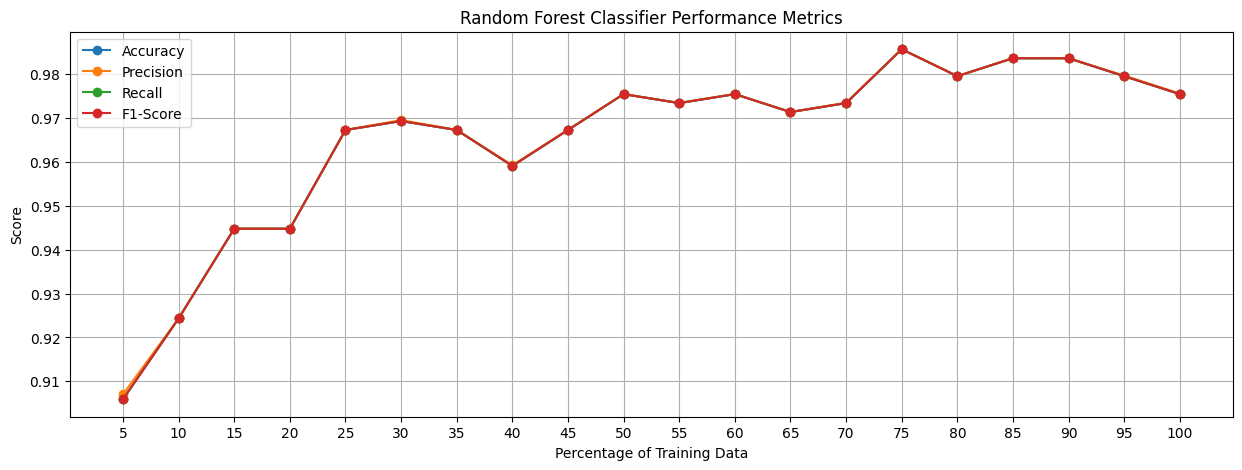

In [23]:
plot_results('Random Forest Classifier',rfc_result)

XG Boost Classifier

In [24]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_result = train_validate_model(xgb_model, x_train, y_train)
print(xgb_result)

c:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [21:31:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [21:31:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [21:31:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

    Percentage of Training Data  Accuracy  Precision    Recall  F1-Score
0                             5  0.903885   0.903982  0.903885  0.903900
1                            10  0.920245   0.920339  0.920245  0.920257
2                            15  0.936605   0.936621  0.936605  0.936609
3                            20  0.950920   0.950938  0.950920  0.950913
4                            25  0.967280   0.967422  0.967280  0.967286
5                            30  0.963190   0.963230  0.963190  0.963194
6                            35  0.969325   0.969337  0.969325  0.969327
7                            40  0.965235   0.965247  0.965235  0.965237
8                            45  0.971370   0.971409  0.971370  0.971373
9                            50  0.973415   0.973426  0.973415  0.973417
10                           55  0.975460   0.975460  0.975460  0.975460
11                           60  0.977505   0.977516  0.977505  0.977506
12                           65  0.977505   0.97751

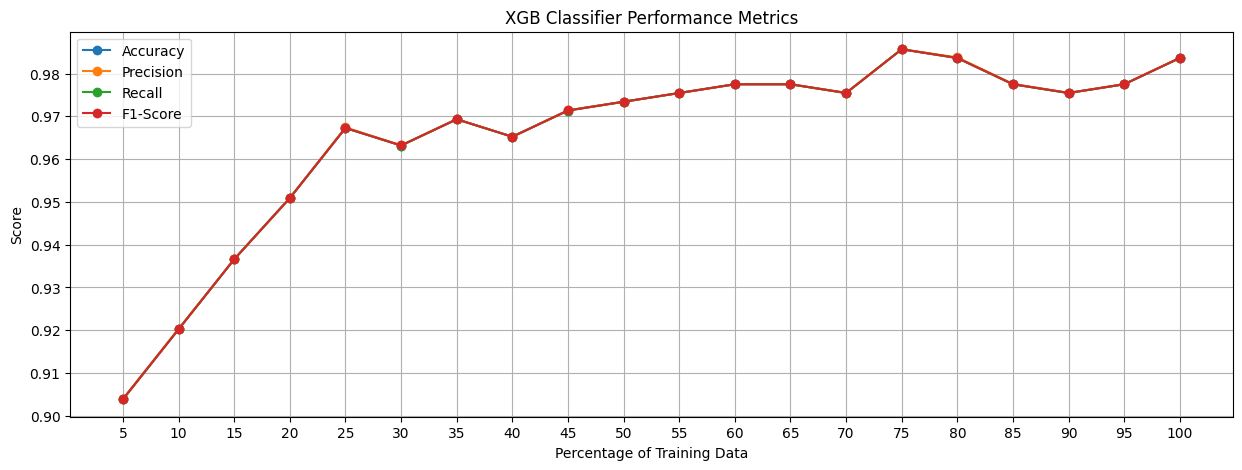

In [25]:
plot_results('XGB Classifier',xgb_result)

SVM Linear Classifer

In [26]:
svm_linear_model = SVC(kernel='linear', random_state=42)
svm_linear_result = train_validate_model(svm_linear_model, x_train, y_train)
print(svm_linear_result)

    Percentage of Training Data  Accuracy  Precision    Recall  F1-Score
0                             5  0.910020   0.910070  0.910020  0.910030
1                            10  0.916155   0.916152  0.916155  0.916150
2                            15  0.920245   0.922126  0.920245  0.920063
3                            20  0.938650   0.938869  0.938650  0.938618
4                            25  0.952965   0.952967  0.952965  0.952962
5                            30  0.948875   0.948962  0.948875  0.948883
6                            35  0.952965   0.952967  0.952965  0.952962
7                            40  0.963190   0.963212  0.963190  0.963185
8                            45  0.969325   0.969541  0.969325  0.969332
9                            50  0.969325   0.969407  0.969325  0.969330
10                           55  0.971370   0.971676  0.971370  0.971377
11                           60  0.967280   0.967422  0.967280  0.967286
12                           65  0.973415   0.97342

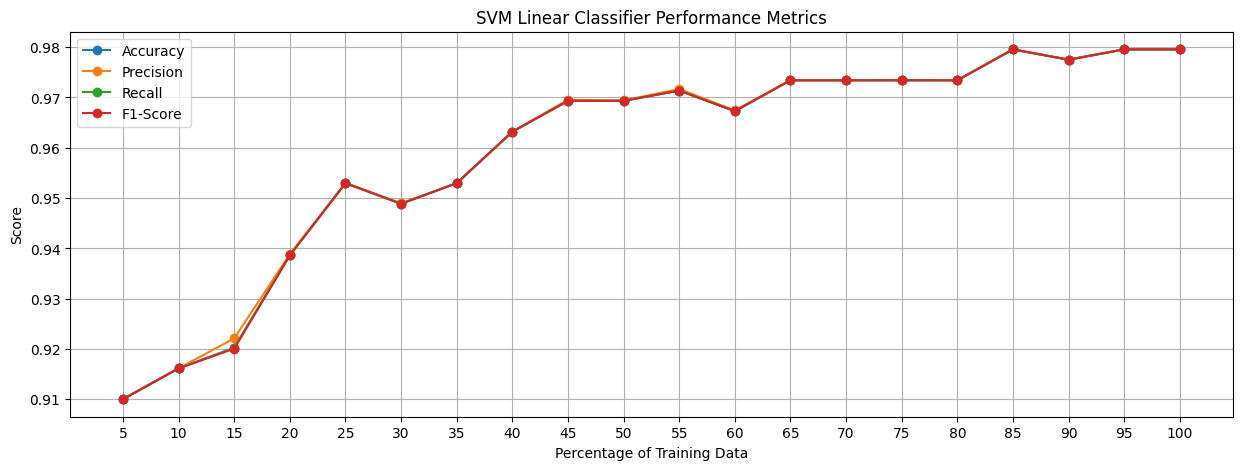

In [27]:
plot_results('SVM Linear Classifier',svm_linear_result)

SVM RBF Classifier

In [28]:
svm_rbf_model=SVC(kernel='rbf', random_state=42)
svm_rbf_result=train_validate_model(svm_rbf_model, x_train, y_train)
print(svm_rbf_result)

    Percentage of Training Data  Accuracy  Precision    Recall  F1-Score
0                             5  0.867076   0.881808  0.867076  0.866236
1                            10  0.895706   0.895936  0.895706  0.895727
2                            15  0.918200   0.918391  0.918200  0.918157
3                            20  0.920245   0.920242  0.920245  0.920240
4                            25  0.924335   0.924428  0.924335  0.924347
5                            30  0.928425   0.928517  0.928425  0.928436
6                            35  0.934560   0.935091  0.934560  0.934576
7                            40  0.934560   0.934871  0.934560  0.934575
8                            45  0.938650   0.938961  0.938650  0.938664
9                            50  0.944785   0.945006  0.944785  0.944797
10                           55  0.938650   0.939181  0.938650  0.938665
11                           60  0.942740   0.943272  0.942740  0.942754
12                           65  0.942740   0.94327

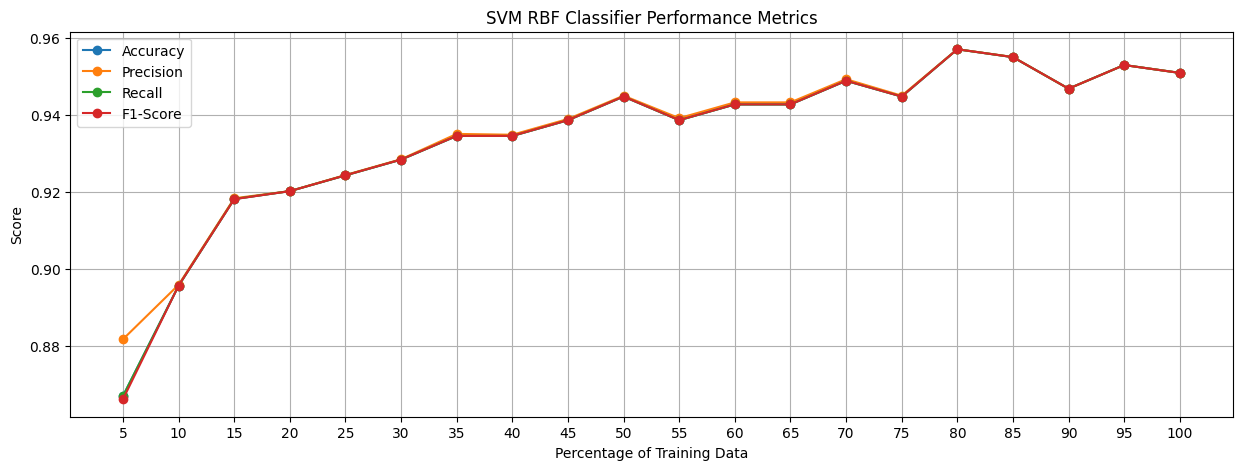

In [29]:
plot_results('SVM RBF Classifier',svm_rbf_result)

Naive Bayes Classifier

In [30]:
nb_model=GaussianNB()
nb_result=train_validate_model(nb_model, x_train, y_train)
print(nb_result)

    Percentage of Training Data  Accuracy  Precision    Recall  F1-Score
0                             5  0.930470   0.932456  0.930470  0.930466
1                            10  0.924335   0.924428  0.924335  0.924347
2                            15  0.938650   0.938695  0.938650  0.938657
3                            20  0.940695   0.940917  0.940695  0.940708
4                            25  0.942740   0.943272  0.942740  0.942754
5                            30  0.934560   0.936101  0.934560  0.934564
6                            35  0.936605   0.938855  0.936605  0.936596
7                            40  0.934560   0.937640  0.934560  0.934533
8                            45  0.936605   0.940004  0.936605  0.936572
9                            50  0.934560   0.938272  0.934560  0.934518
10                           55  0.944785   0.946133  0.944785  0.944791
11                           60  0.936605   0.939399  0.936605  0.936585
12                           65  0.942740   0.94475

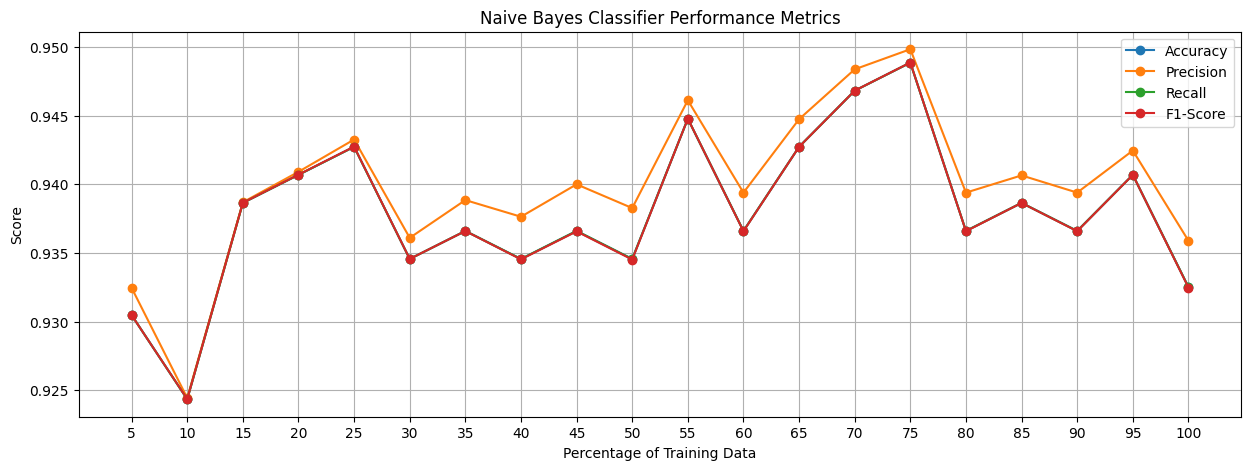

In [31]:
plot_results('Naive Bayes Classifier',nb_result)

KNN Classifiers

In [32]:
knn_model=KNeighborsClassifier()
knn_result=train_validate_model(knn_model, x_train, y_train)
print(knn_result)

    Percentage of Training Data  Accuracy  Precision    Recall  F1-Score
0                             5  0.680982   0.684941  0.680982  0.680381
1                            10  0.613497   0.613547  0.613497  0.613520
2                            15  0.640082   0.640768  0.640082  0.640157
3                            20  0.660532   0.661226  0.660532  0.660603
4                            25  0.693252   0.695320  0.693252  0.693123
5                            30  0.709611   0.710127  0.709611  0.709679
6                            35  0.760736   0.761594  0.760736  0.760780
7                            40  0.775051   0.775386  0.775051  0.775102
8                            45  0.779141   0.779662  0.779141  0.779193
9                            50  0.781186   0.782057  0.781186  0.781226
10                           55  0.801636   0.802520  0.801636  0.801672
11                           60  0.801636   0.802057  0.801636  0.801682
12                           65  0.807771   0.80795

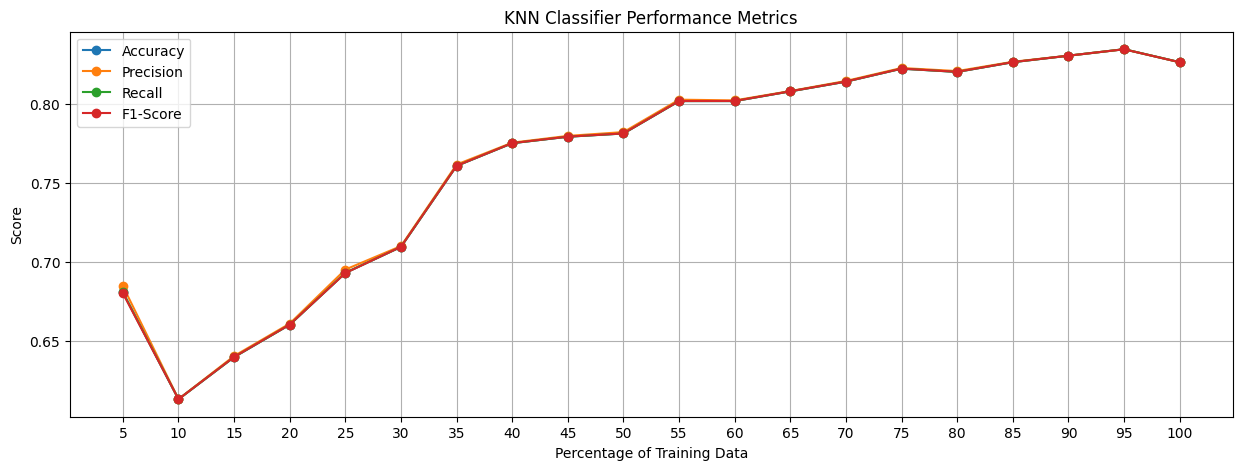

In [33]:
plot_results('KNN Classifier',knn_result)

Plotting Accuracies of all 8 models to different training data sizes

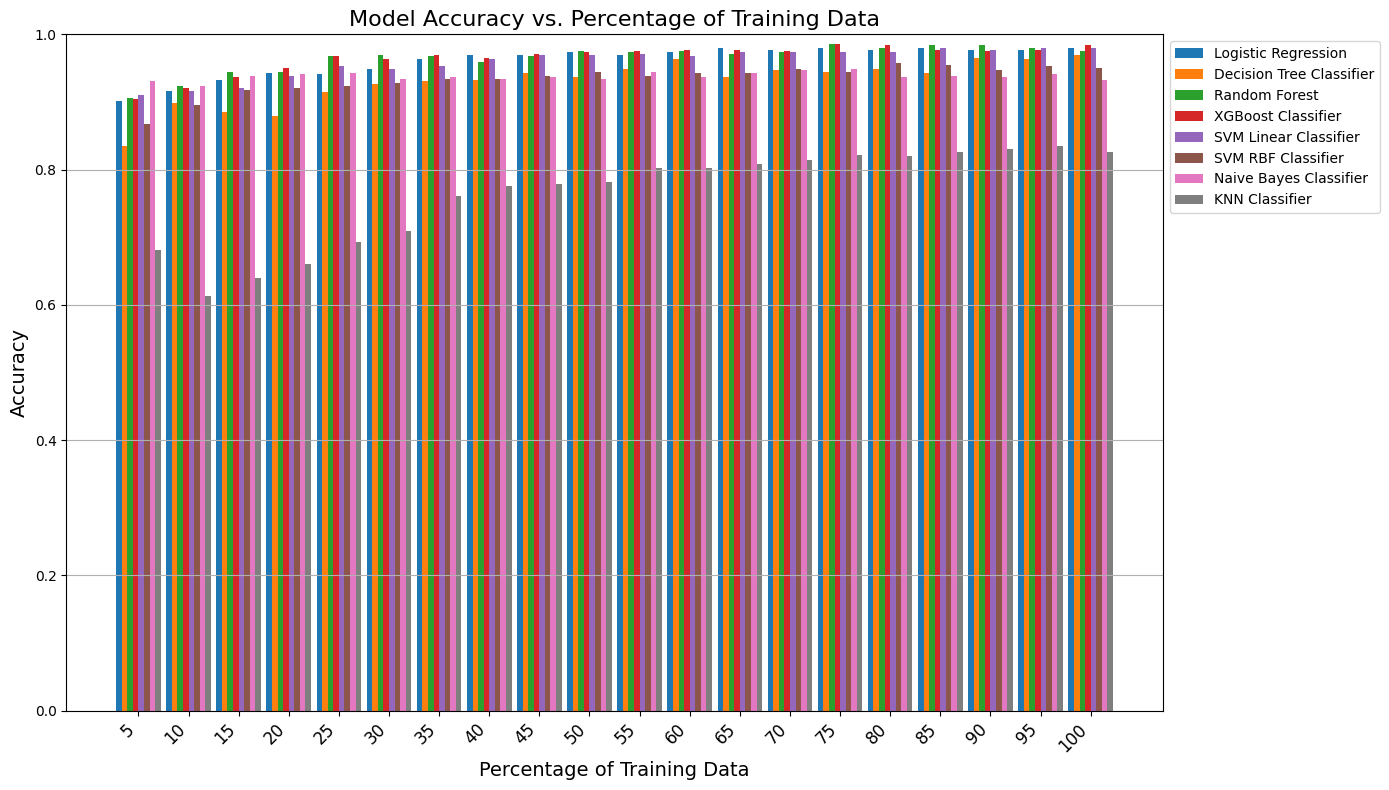

In [34]:
bar_width = 0.1 
num_bars = 8  

x = np.arange(len(lr_result['Percentage of Training Data'])) * (num_bars + 1) * bar_width

plt.figure(figsize=(14, 8))
plt.bar(x - bar_width * 3.5, lr_result['Accuracy'], width=bar_width, label='Logistic Regression')
plt.bar(x - bar_width * 2.5, dtc_result['Accuracy'], width=bar_width, label='Decision Tree Classifier')
plt.bar(x - bar_width * 1.5, rfc_result['Accuracy'], width=bar_width, label='Random Forest')
plt.bar(x - bar_width * 0.5, xgb_result['Accuracy'], width=bar_width, label='XGBoost Classifier')
plt.bar(x + bar_width * 0.5, svm_linear_result['Accuracy'], width=bar_width, label='SVM Linear Classifier')
plt.bar(x + bar_width * 1.5, svm_rbf_result['Accuracy'], width=bar_width, label='SVM RBF Classifier')
plt.bar(x + bar_width * 2.5, nb_result['Accuracy'], width=bar_width, label='Naive Bayes Classifier')
plt.bar(x + bar_width * 3.5, knn_result['Accuracy'], width=bar_width, label='KNN Classifier')

plt.title('Model Accuracy vs. Percentage of Training Data', fontsize=16)
plt.xlabel('Percentage of Training Data', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

plt.xticks(x, lr_result['Percentage of Training Data'], rotation=45, ha='right', fontsize=12)

plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [39]:
bar_width = 0.1 
num_bars = 8  

x = np.arange(len(lr_result['Percentage of Training Data'])) * (num_bars + 1) * bar_width

plt.figure(figsize=(14, 8))
plt.bar(x - bar_width * 3.5, lr_result['Accuracy'], width=bar_width, label='Logistic Regression')
plt.bar(x - bar_width * 2.5, dtc_result['Accuracy'], width=bar_width, label='Decision Tree Classifier')
plt.bar(x - bar_width * 1.5, rfc_result['Accuracy'], width=bar_width, label='Random Forest')
plt.bar(x - bar_width * 0.5, xgb_result['Accuracy'], width=bar_width, label='XGBoost Classifier')
plt.bar(x + bar_width * 0.5, svm_linear_result['Accuracy'], width=bar_width, label='SVM Linear Classifier')
plt.bar(x + bar_width * 1.5, svm_rbf_result['Accuracy'], width=bar_width, label='SVM RBF Classifier')
plt.bar(x + bar_width * 2.5, nb_result['Accuracy'], width=bar_width, label='Naive Bayes Classifier')
plt.bar(x + bar_width * 3.5, knn_result['Accuracy'], width=bar_width, label='KNN Classifier')

plt.title('Model Accuracy vs. Percentage of Training Data', fontsize=16)
plt.xlabel('Percentage of Training Data', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

plt.xticks(x, lr_result['Percentage of Training Data'], rotation=45, ha='right', fontsize=12)

plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


Model with the highest accuracy: Random Forest
Percentage of Training Data: 75%
Highest accuracy: 0.9857


At 75% of training data size, using Random Forest we get about 98.56% accuracy, which is the highest.

Predicting labels for test data using Random Forest at 75% of training data.

In [7]:
x_train_split, _, y_train_split, _ = train_test_split(x_train, y_train, test_size=0.25, random_state=42)
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train_split, y_train_split)
y_test_pred = rf_classifier.predict(x_test)
np.save("pred_deepfeat.txt", y_test_pred)